<a href="https://colab.research.google.com/github/dudududukim/Deeplearning_learning/blob/main/MNIST_dataset_with_epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==1.4.0

In [ ]:
#epoch와 batch를 이용
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import torch
 
tf.set_random_seed(777)  # for reproducibility
 
'''
from tensorflow.examples.tutorials.mnist import input_data
 
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
 
nb_classes = 10
'''
#file input from google drive
xy=np.loadtxt('/content/drive/MyDrive/tensorflow/mnist/train.csv',delimiter=',',dtype=np.float32)
x_data = xy[:,1:]
y_data = xy[:,0]

test_x=np.loadtxt('/content/drive/MyDrive/tensorflow/mnist/test.csv',delimiter=',',dtype=np.float32)


print(y_data)
print(len(y_data))
print(y_data.reshape(len(y_data),1))

'''
filename_queue = tf.train.string_input_producer(
    ['/content/drive/MyDrive/tensorflow/mnist/train.csv'], shuffle=False, name='filename_queue')
 
reader=tf.TextLineReader()
key, value = reader.read(filename_queue)
 
record_defaults=[[0.]]*785
xy=tf.decode_csv(value, record_defaults=record_defaults)
 
train_x, train_y =(tf.train.batch([xy[1:], xy[:1]],batch_size=1000))
test_x, test_y =(tf.train.batch([xy[1:], xy[:1]],batch_size=100))
'''



[1. 0. 1. ... 7. 6. 9.]
42000
[[1.]
 [0.]
 [1.]
 ...
 [7.]
 [6.]
 [9.]]


"\nfilename_queue = tf.train.string_input_producer(\n    ['/content/drive/MyDrive/tensorflow/mnist/train.csv'], shuffle=False, name='filename_queue')\n \nreader=tf.TextLineReader()\nkey, value = reader.read(filename_queue)\n \nrecord_defaults=[[0.]]*785\nxy=tf.decode_csv(value, record_defaults=record_defaults)\n \ntrain_x, train_y =(tf.train.batch([xy[1:], xy[:1]],batch_size=1000))\ntest_x, test_y =(tf.train.batch([xy[1:], xy[:1]],batch_size=100))\n"

Epoch: 0001, Cost: 11.183201962
Epoch: 0004, Cost: 4.006881569
Epoch: 0007, Cost: 2.624684361
Epoch: 0010, Cost: 1.771718924
Epoch: 0013, Cost: 1.243501645
Epoch: 0016, Cost: 1.146339199
Epoch: 0019, Cost: 0.922303336
Epoch: 0022, Cost: 0.819265311
Epoch: 0025, Cost: 0.717500668
Epoch: 0028, Cost: 0.657070124
Epoch: 0031, Cost: 0.617037165
Epoch: 0034, Cost: 0.589176033
Epoch: 0037, Cost: 0.564037795
Epoch: 0040, Cost: 0.545135425
Epoch: 0043, Cost: 0.527032580
Epoch: 0046, Cost: 0.512335532
Epoch: 0049, Cost: 0.497219885
Learning finished
Accuracy:  0.812
16337 Prediction:  [6]


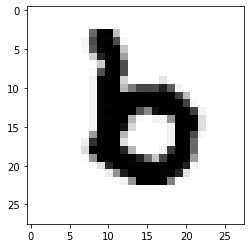

2723 Prediction:  [8]


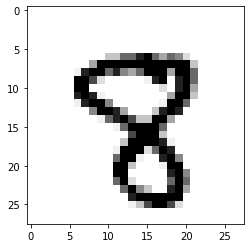

27880 Prediction:  [8]


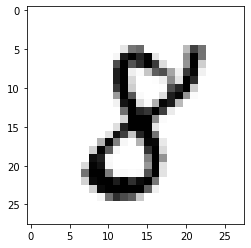

16920 Prediction:  [0]


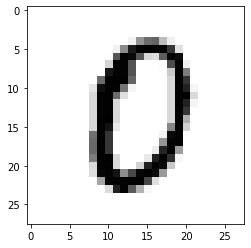

13791 Prediction:  [2]


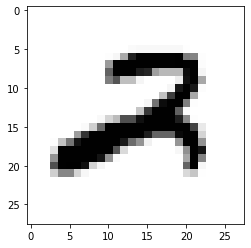

In [ ]:
nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
x = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
y = tf.placeholder(tf.int32, [None, 1])
 
y_one_hot = tf.one_hot(y, nb_classes)
y_one_hot = tf.reshape(y_one_hot, [-1, nb_classes])
 
w = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))
 
# Hypothesis (using softmax)
logits = tf.matmul(x,w)+b
hypothesis = tf.nn.softmax(logits)
 
cost_i=tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
cost=tf.reduce_mean(cost_i)
 
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
 
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_one_hot, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
 
with tf.Session() as sess:
  # parameters
  num_epochs = 50
  batch_size = 100
  num_iterations = int(len(y_data) / batch_size)
  
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  # Training cycle
  for epoch in range(num_epochs):
    avg_cost = 0
    _, cost_val = sess.run([train, cost], feed_dict={x: x_data, y:y_data.reshape(len(y_data),1)})
    avg_cost += cost_val / num_iterations
    if epoch%3==0:
      print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
    
  print("Learning finished")
 
  # Test the model using test sets
  print(
      "Accuracy: ",
      accuracy.eval(
          session=sess, feed_dict={x: x_data, y: y_data.reshape(len(y_data),1)}
      ),
  )
 
  # Get one and predict
  for step in range(5):
    r = random.randint(0, len(test_x) - 1)
    print(
      r, "Prediction: ",
      sess.run(tf.argmax(hypothesis, 1), feed_dict={x: test_x[r : r + 1]}),
    )
 
    plt.imshow(
      test_x[r : r + 1].reshape(28, 28),
      cmap="Greys",
      interpolation="nearest",
    )
    plt.show()